<a href="https://colab.research.google.com/github/AkankshaTyagi11/data255_hw3/blob/main/Akanksha_Tyagi_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from google.colab import drive

torch.manual_seed(42)

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Github

https://github.com/AkankshaTyagi11/data255_hw3/blob/main/Akanksha_Tyagi_HW_3.ipynb

# Dataset

* Step 1: Create your own custom dataset featuring 3 custom categories of at least 100 images each.
* Step 2: Split this data between 80% training and 20% test.
* Step 3. Preprocess the data as you see fit

We create a butterfly dataset under `butterfly_dataset`.
The dataset contains 375 images. Out of 375 images 75 images are in the test set (20 %).

In [22]:
# Define data transformations for data augmentation and normalization
# Images are already normalized to 0-1 and are of 224x224.
# We subtract mean and divide by standard deviation as the preprocessing step.

data_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_dir = "/content/drive/MyDrive/dataset_butterfly"
full_dataset = datasets.ImageFolder(data_dir, transform=data_transforms)
train_size = int(0.8 * len(full_dataset))  # Calculate 80% of dataset size
test_size = len(full_dataset) - train_size  # Calculate 20% of dataset size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

image_datasets = {'train': train_dataset, 'test': test_dataset}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2) for x in ['train', 'test']}

In [23]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
print(f'Number of samples in each set: \n {dataset_sizes}')
total_size = sum(dataset_sizes.values())
train_ratio = dataset_sizes['train'] / total_size
test_ratio = dataset_sizes['test'] / total_size
print(f"{train_ratio = }")
print(f"{test_ratio = }")

class_names = full_dataset.classes

print(f'Dataset classes:\n{class_names}')

Number of samples in each set: 
 {'train': 300, 'test': 75}
train_ratio = 0.8
test_ratio = 0.2
Dataset classes:
['ADONIS', 'APPOLLO', 'MOURNING CLOAK']


### Visualize dataset

In [24]:
def visualize_dataset(image_datasets, split):
  figure = plt.figure(figsize=(5, 5), dpi=100)
  cols, rows = 2, 2
  dataset = image_datasets['train']
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(dataset), size=(1,)).item()
      img, label = dataset[sample_idx]
      class_name = class_names[label]
      figure.add_subplot(rows, cols, i)
      plt.title(f'{class_name}')
      plt.axis("off")

      img = (img - img.min()) / (img.max() - img.min())
      plt.imshow(img.permute(1, 2, 0).squeeze())
  plt.show()

**Train Dataset**

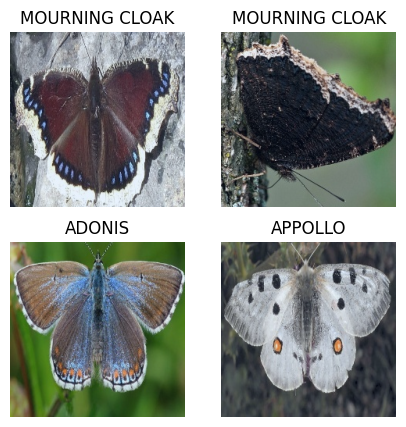

In [25]:
visualize_dataset(image_datasets, 'train')

**Test Dataset**

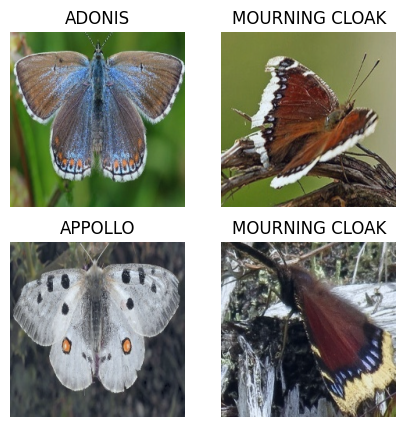

In [27]:
visualize_dataset(image_datasets, 'test')

### Step 4. Create a Convolutional Neural Network model to learn about your training set

In [28]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs, device):
  '''This function train a model.
  '''
  for epoch in range(num_epochs):
      for phase in ['train', 'test']:
          if phase == 'train':
              model.train()
          else:
              model.eval()

          running_loss = 0.0
          running_corrects = 0

          for inputs, labels in dataloaders[phase]:
              inputs = inputs.to(device)
              labels = labels.to(device)

              optimizer.zero_grad()

              with torch.set_grad_enabled(phase == 'train'):
                  outputs = model(inputs)
                  _, preds = torch.max(outputs, 1)
                  loss = criterion(outputs, labels)

                  if phase == 'train':
                      loss.backward()
                      optimizer.step()

              running_loss += loss.item() * inputs.size(0)
              running_corrects += torch.sum(preds == labels.data)

          epoch_loss = running_loss / dataset_sizes[phase]
          epoch_acc = running_corrects.double() / dataset_sizes[phase]
          print(f'Epoch: {epoch + 1}')
          print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

  print("Training complete!")

In [29]:
# Define a CNN.
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(start_dim=1),
    nn.Linear(28 * 28 * 64, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_model(model, criterion, optimizer, dataloaders, num_epochs=10, device=device)

Epoch: 1
train Loss: 0.5868 Acc: 0.7333
Epoch: 1
test Loss: 0.2627 Acc: 0.8933
Epoch: 2
train Loss: 0.1407 Acc: 0.9567
Epoch: 2
test Loss: 0.1822 Acc: 0.9333
Epoch: 3
train Loss: 0.1011 Acc: 0.9733
Epoch: 3
test Loss: 0.1976 Acc: 0.9200
Epoch: 4
train Loss: 0.0359 Acc: 0.9867
Epoch: 4
test Loss: 0.2294 Acc: 0.9200
Epoch: 5
train Loss: 0.0149 Acc: 1.0000
Epoch: 5
test Loss: 0.1742 Acc: 0.9467
Epoch: 6
train Loss: 0.0086 Acc: 1.0000
Epoch: 6
test Loss: 0.1612 Acc: 0.9467
Epoch: 7
train Loss: 0.0038 Acc: 1.0000
Epoch: 7
test Loss: 0.1848 Acc: 0.9200
Epoch: 8
train Loss: 0.0018 Acc: 1.0000
Epoch: 8
test Loss: 0.1953 Acc: 0.9200
Epoch: 9
train Loss: 0.0013 Acc: 1.0000
Epoch: 9
test Loss: 0.2099 Acc: 0.9200
Epoch: 10
train Loss: 0.0010 Acc: 1.0000
Epoch: 10
test Loss: 0.1975 Acc: 0.9467
Training complete!


### Step 5. Make predictions on the test data and compare them to the expected categories

In [41]:
def show_predictions(model, dataset):
  figure = plt.figure(figsize=(7, 7), dpi=100)
  cols, rows = 2, 2
  model.eval()
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(dataset), size=(1,)).item()
      img, label = dataset[sample_idx]
      with torch.no_grad():
        outputs = model(img.unsqueeze(0))
      _, predicted = torch.max(outputs.data, 1)

      class_name = class_names[label]
      pred_class_name = class_names[predicted.item()]
      figure.add_subplot(rows, cols, i)
      plt.title(f'Predicted class: {pred_class_name}\nActual class: {class_name}')
      plt.axis("off")

      img = (img - img.min()) / (img.max() - img.min())
      plt.imshow(img.permute(1, 2, 0).squeeze())
      plt.tight_layout()
  plt.show()

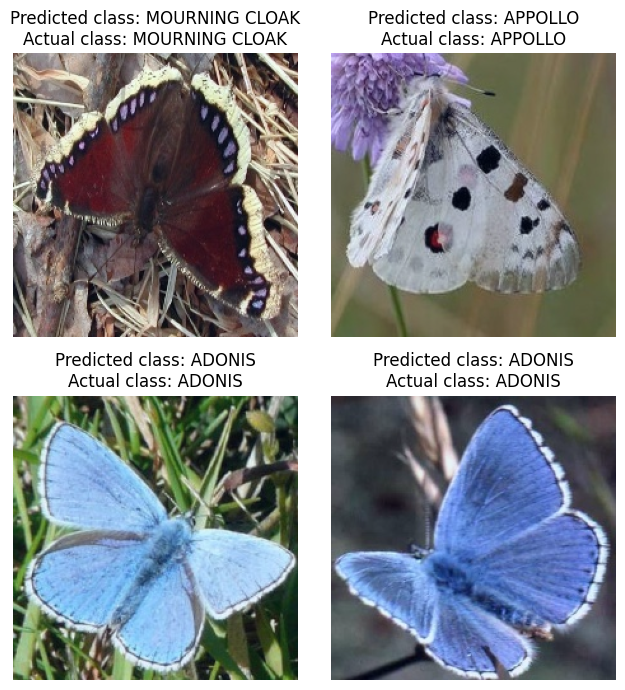

In [42]:
show_predictions(model, image_datasets['test'])

### Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

In [44]:
# Create a new model with the correct final layer
new_model = models.googlenet(weights='IMAGENET1K_V1')
new_model.fc = nn.Linear(new_model.fc.in_features, 3)  # Add a linear layer on top of it.

### Step 7: Train the GoogleNet model and compare the accuracy with the first model.

In [45]:
# Freeze all layers except the final classification layer
for name, param in new_model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

optimizer = optim.SGD(new_model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters
train_model(new_model, criterion, optimizer, dataloaders, num_epochs=10, device=device)

Epoch: 1
train Loss: 0.8109 Acc: 0.6667
Epoch: 1
test Loss: 0.4339 Acc: 0.9200
Epoch: 2
train Loss: 0.4891 Acc: 0.8267
Epoch: 2
test Loss: 0.2447 Acc: 0.9467
Epoch: 3
train Loss: 0.3502 Acc: 0.9100
Epoch: 3
test Loss: 0.1938 Acc: 0.9467
Epoch: 4
train Loss: 0.3990 Acc: 0.8500
Epoch: 4
test Loss: 0.1794 Acc: 0.9467
Epoch: 5
train Loss: 0.3620 Acc: 0.8767
Epoch: 5
test Loss: 0.1348 Acc: 0.9867
Epoch: 6
train Loss: 0.2905 Acc: 0.9233
Epoch: 6
test Loss: 0.1103 Acc: 0.9867
Epoch: 7
train Loss: 0.2195 Acc: 0.9267
Epoch: 7
test Loss: 0.1021 Acc: 0.9867
Epoch: 8
train Loss: 0.2810 Acc: 0.8833
Epoch: 8
test Loss: 0.0894 Acc: 0.9867
Epoch: 9
train Loss: 0.2514 Acc: 0.9133
Epoch: 9
test Loss: 0.0969 Acc: 0.9733
Epoch: 10
train Loss: 0.2509 Acc: 0.9000
Epoch: 10
test Loss: 0.0914 Acc: 0.9733
Training complete!


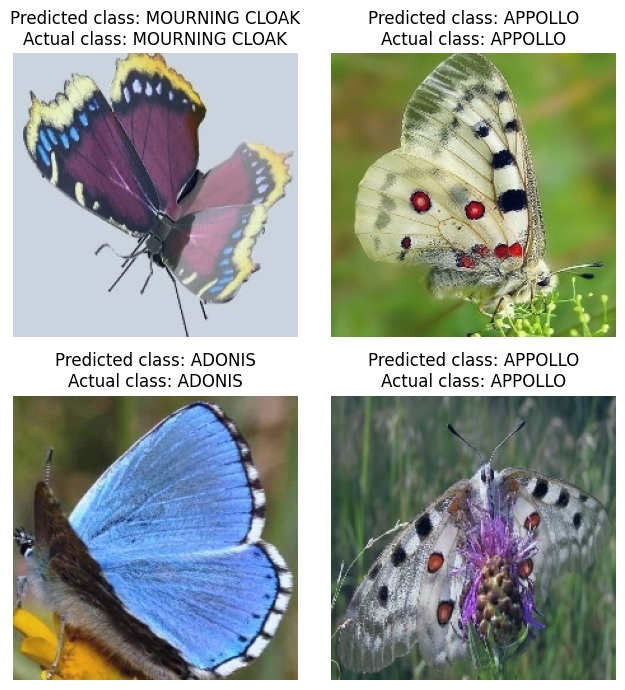

In [47]:
show_predictions(new_model, image_datasets['test'])

**Comparison with the previous model**

We see that googlenet model achieves a test accuracy of 97.33 % as compared to the previous model that achieves a test accuracy of 94.67 %. This is because we use pretrained ImageNet weights in the googlenet model, which results in strong features for classification of butterflies.

We also notice overfitting in the previous model. But, the googlenet model doesn't have that. This is because, we train only on the last linear layer of the model. So, the model doesn't overfit to the small dataset.